In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame([[ 8,  8,  1],[ 7,  9,  1],[ 6, 10,  0],[ 8,  7,  0],[ 7,  8,  1],[ 6,  9,  0],[ 8,  6,  1],[ 7,  7,  0],[ 6,  8,  1],[ 8,  5,  0],[ 7,  6,  1],[ 6,  7,  0],[ 8,  4,  0],[ 7,  5,  0],[ 6,  6,  0],[ 8,  3,  0],[ 7,  4,  0],[ 6,  5,  0],[ 8,  2,  0],[ 7,  3,  0],[ 6,  4,  0],[ 8,  1,  0],[ 7,  2,  0],[ 6,  3,  0],[ 7,  1,  0],[ 6,  2,  0],[ 6,  1,  0],[ 8,  9,  1],[ 7, 10,  1],[ 6, 11,  0],[ 5,  8,  0],[ 4,  7,  0],[ 3,  6,  0],[ 2,  5,  0],[ 1,  4,  0],[ 9,  8,  1],[10,  7,  1],[11,  6,  1],[ 8,  8,  1],[ 7,  9,  1],[ 6, 10,  0],[ 8,  7,  0],[ 7,  8,  1],[ 6,  9,  0],[ 8,  6,  1],[ 7,  7,  0],[ 6,  8,  1],[ 8,  5,  0],[ 7,  6,  1],[ 6,  7,  0]], columns=['cgpa', 'profile_score', 'placed'])


df.head()

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,10,0
3,8,7,0
4,7,8,1


In [3]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [4]:
# Utility Functions
def sigmoid(Z):
  
  A = 1/(1+np.exp(-Z))

  return A

In [5]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)
  
  return A

In [6]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev


In [7]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [8]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters


Loss for this student -  0.613402628898913


{'W1': array([[0.10000513, 0.10000513],
        [0.10000513, 0.10000513]]),
 'b1': array([[6.41054186e-07],
        [6.41054186e-07]]),
 'W2': array([[0.10003815],
        [0.10003815]]),
 'b2': array([[0.100084]])}

In [9]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8352790882003202


{'W1': array([[0.10000038, 0.09999722],
        [0.10000038, 0.09999722]]),
 'b1': array([[-1.5023911e-07],
        [-1.5023911e-07]]),
 'W2': array([[0.09999103],
        [0.09999103]]),
 'b2': array([[0.09993441]])}

In [10]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8335139544190342


{'W1': array([[0.09999364, 0.09999132],
        [0.09999364, 0.09999131]]),
 'b1': array([[-9.93164374e-07],
        [-9.93189797e-07]]),
 'W2': array([[0.0999448],
        [0.0999448]]),
 'b2': array([[0.09988825]])}

In [32]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 3000
plot_L=[]
for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
    
#   print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean(),end=" ")
  # print('Loss:',np.array(Loss).mean(),end=", ")
  plot_L.append(np.array(Loss).mean())
 
parameters
# plot_L

{'W1': array([[0.23904043, 0.14177568],
        [0.17532824, 0.05871222]]),
 'b1': array([[0.03513724],
        [0.03206434]]),
 'W2': array([[-0.2373656],
        [-0.2107266]]),
 'b2': array([[-0.21076207]])}

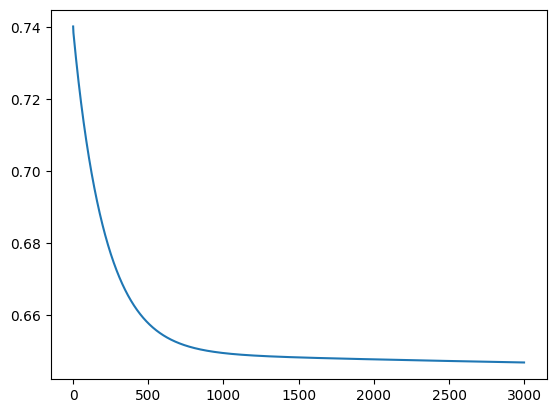

In [33]:
import matplotlib.pyplot as plt

plt.plot(plot_L)